<h3>Análisis y aplicación de modelos predictivos para conocer si una charla TED se va a viralizar o no.</h3>
<blockquote>
        <ul>
          <li>Análisis exploratorio de las variables</li> 
          <li>Binarización de la variable target (views) y entrenamiento de modelos con la aplicación de pipelines y GridSearch para obtener los  hiperparámetros óptimos.</li> 
          <li>Uso de las herramientas de Clustering para encontrar comportamientos en las variables que permitan encontrar agrupaciones entre ellas, y analizar cada cluster.</li> 
        </ul>
</blockquote>

<img src="https://09c449efca3bbeb52dcea716-ddjaey2ypcfdo.netdna-ssl.com/wp-content/uploads/2017/03/TED.gif" width="500" height="600" align="left">


# Índice

<b>A. [Workflow para Análisis exploratorio de la información del Dataset](#explore)</b><br>
&nbsp;&nbsp;&nbsp;&nbsp; 1. [Importación de librerias.](#1)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 2. [Identificación de variables y tipos de datos.](#2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 3. [Identificar valores faltantes y duplicados.](#3)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 4. [Determinación de variables.](#4)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 5. [Distribución de las variables numéricas.](#5)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 6. [Tratamiento de las variables categoricas.](#6)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 7. [Tratamiento de las variables con fechas.](#7)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 8. [Tratamiento de la variable "views" como variable target.](#8)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 9. [Binarizamos la variable views.](#9)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 10. [Creacion de pipelines.](#10)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 11. [Train Test Split y modelado.](#11)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 12. [Modelo KNN.](#12)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 13. [Comparación de los dos modelos usados anteriormente pero ahora optimizados con GridSearch.](#13)<br>
<b>B. [Clustering](#explore)</b><br>
&nbsp;&nbsp;&nbsp;&nbsp; 14. [Clustering. Intentamos buscar algunas características de las features que nos permitan agruparlas entre sí.](#14)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 15. [Silhouette  Score.](#15)<br>
&nbsp;&nbsp;&nbsp;&nbsp; 16. [Visualización en un espacio de dimensionalidad reducida.](#16)<br>



<div class="alert"  
     style="font-size:25px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 5px outset black; background-color: black;border-radius: 25px;">                
        <b>A. </b> <a id='explore'>Workflow para Análisis exploratorio de la información del Dataset</a>
</div>

<div class=""  
     style="font-size:20px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Importación de Librerías
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, make_union
import re
from datetime import datetime, date
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score,calinski_harabasz_score,classification_report,confusion_matrix
from scipy.spatial.distance import pdist,squareform
from sklearn.decomposition import PCA
import mglearn.plots
from sklearn.metrics import matthews_corrcoef
import scipy.stats
plt.style.use('seaborn')


#matplotlib.style.use('ggplot')
%matplotlib inline


Bad key text.latex.unicode in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\Agust\miniconda3\envs\dhdsblend\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplo

ModuleNotFoundError: No module named 'mglearn'

<div class=""  
     style="font-size:20px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Lectura del data set <b>"charlasTED.csv"<b>
</div>

In [4]:
data = pd.read_csv('Data/ted_main.csv')

data.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">                
        <a id='2'>2. Identificación de variables y tipos de datos.</a>
</div>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

<div class=""  
     style="font-size:13px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Agrupo el resultado por tipo de datos de los atributos, para mejor entendimiento de los mismos
</div>


In [6]:
data.dtypes.groupby(by=[data.dtypes,data.dtypes.index]).count()

int64   comments              1
        duration              1
        film_date             1
        languages             1
        num_speaker           1
        published_date        1
        views                 1
object  description           1
        event                 1
        main_speaker          1
        name                  1
        ratings               1
        related_talks         1
        speaker_occupation    1
        tags                  1
        title                 1
        url                   1
dtype: int64

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">                
        <a id='3'>3. Identificar valores faltantes y duplicados.</a>
</div>

In [7]:
faltantes_duplicados = pd.DataFrame(columns=['Atributo',
                                         'Nulos',
                                         'Duplicados'])

In [8]:
for element in data.columns.tolist():
    faltantes_duplicados = faltantes_duplicados.append(pd.Series(data=[element,
                                                               np.round(np.float64(data[element].isnull().sum()),1),
                                                               np.float64(data[element].duplicated().sum())
                                                               
                                                               ],
                                                               index=['Atributo',
                                                                      'Nulos',
                                                                      'Duplicados']
                                                               ),ignore_index=True)
faltantes_duplicados = faltantes_duplicados.set_index('Atributo')
faltantes_duplicados.style.background_gradient(cmap='cividis') 

,Nulos,Duplicados
Atributo,,
comments,0.000000,1991.000000
description,0.000000,0.000000
duration,0.000000,1467.000000
event,0.000000,2195.000000
film_date,0.000000,1815.000000
languages,0.000000,2484.000000
main_speaker,0.000000,394.000000
name,0.000000,0.000000
num_speaker,0.000000,2545.000000


<div class=""  
     style="font-size:13px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Veo que no hay ningún duplicado en title o description, entonces considero que no hay charlas que deba eliminar.
</div>

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='4'>4. Determinación de variables.</a>
</div>


| Columna | Tipo | Descripcion | Tratamiento |
| :--- | :--- | :--- | :--- |
|  <font color=blue>**comments**</font> | Numeric | Cantidad de comentarios. | Estandarizar |
|  <font color=blue>**description**</font> | Text | Descripción breve de la charla. |  |
|  <font color=blue>**duration**</font> | Numeric | La duración en segundos. | Estandarizar |
|  <font color=blue>**event**</font> | Text | El evento TED/TEDx al cual pertenció cada charla. |  |
|  <font color=blue>**film_date**</font> | Timestamp | Fecha de cada charla. | Se convierte a datetime. |
|  <font color=blue>**languages**</font> | Numeric | La cantidad de idiomas a los cuáles fue traducida cada charla. | Estandarizar |
|  <font color=blue>**main_speaker**</font> | Text | El primer orador nombrado de cada charla. |  |
|  <font color=blue>**name**</font> | Text | El nombre oficial de cada charla. Incluye al nombre del orador y el titulo de la charla. | |
|  <font color=blue>**num_speaker**</font> | Numeric | La cantidad de hosts de la charla. |  |
|  <font color=blue>**published_date**</font> | Timestamp | Fecha de cuándo se publicó la charla en TED.com | Se convierte a datetime. |
|  <font color=blue>**ratings**</font> | Text | Una serie de diccionarios con varios feedbacks de la charla (inspiring, fascinating, jaw dropping, etc.) |  |
|  <font color=blue>**related_talks**</font> | Text | Una lista de diccionarios con recomendaciones de charlas TED relacionadas. | |
|  <font color=blue>**speaker_occupation**</font> | Text | La ocupación del host principal. | Se generan dummies con OneHotEncoder |
|  <font color=blue>**tags**</font> | Text | Temáticas asociadas con la charla.| 
|  <font color=blue>**title**</font> | Text | Título de la charla. | |
|  <font color=blue>**url**</font> | Text | La URL de la charla. | |
|  <font color=blue>**views**</font> | Numeric | La cantidad de views de la charla. | | Se binariza para modelos de clasificación y se estandariza para modelos de clustering incluyendola en la matriz.|  

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='5'>5. Distribución de las variables numéricas.</a>
</div>

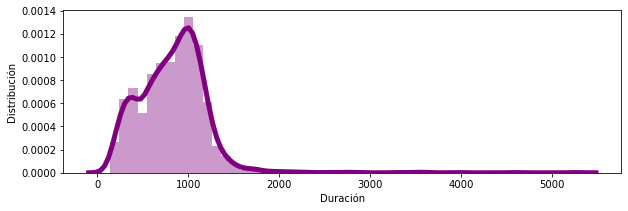

In [9]:
plt.figure(figsize=(10, 3))
sns.distplot(data.duration,color='purple',kde_kws=dict(linewidth=5))
plt.xlabel('Duración')
plt.ylabel('Distribución');

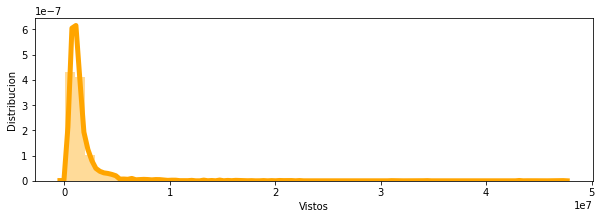

In [10]:
plt.figure(figsize=(10, 3))
sns.distplot(data.views,color='orange',kde_kws=dict(linewidth=5))
plt.xlabel('Vistos')
plt.ylabel('Distribucion');

In [11]:
# Analizar formato de ratings - Diccionario con keys: id, name, count.

data.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='6'>6. Tratamiento de las variables categóricas.</a>
</div>

<div class=""  
     style="font-size:13px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Reemplazo algunos valores que se pueden resumir en un mismo label.
</div>

In [12]:
data['speaker_occupation'] = data['speaker_occupation'].replace('Singer-songwriter', 'Singer/songwriter')
data['speaker_occupation'] = data['speaker_occupation'].replace(['Writer, activist','Performance poet, multimedia artist','Novelist','Poet'], 'Writer')
data['speaker_occupation'] = data['speaker_occupation'].replace(['Singer/songwriter','Musician, activist'], 'Musician')
data['speaker_occupation'] = data['speaker_occupation'].replace('Behavioral economist', 'Economist')
data['speaker_occupation'] = data['speaker_occupation'].replace(['Climate advocate', 'Legal activist','Environmentalist, futurist','Social entrepreneur','Activist for environmental justice'], 'Activist')
data['speaker_occupation'] = data['speaker_occupation'].replace(['Astrobiologist','Marine biologist', 'Evolutionary biologist'], 'Biologist')
data['speaker_occupation'] = data['speaker_occupation'].replace('Social psychologist', 'Psychologist')
data['speaker_occupation'] = data['speaker_occupation'].replace('Investor and advocate for moral leadership', 'Investor')
data['speaker_occupation'] = data['speaker_occupation'].replace(['Musician','Comedian','Cartoonist','Violinist'], 'Artist')
data['speaker_occupation'] = data['speaker_occupation'].replace(['Author/educator','Writer'], 'Author')


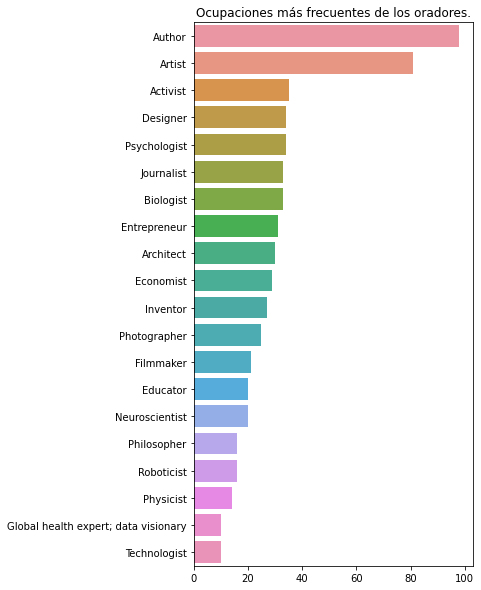

In [13]:
plt.figure(figsize=(5,10))
plt.title('Ocupaciones más frecuentes de los oradores.')
sns.barplot(x=data.speaker_occupation.value_counts()[:20].values, y=data.speaker_occupation.value_counts()[:20].index, orient='h');

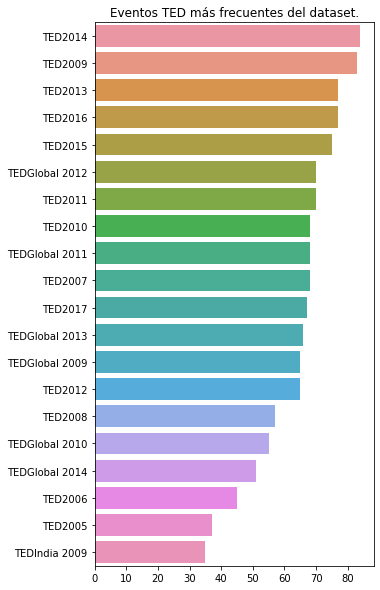

In [14]:
plt.figure(figsize=(5,10))
plt.title('Eventos TED más frecuentes del dataset.')
sns.barplot(x=data.event.value_counts()[:20].values, y=data.event.value_counts()[:20].index, orient='h');

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='7'>7. Tratamiento de las variables con fechas.</a>
</div>

## Fechas: _film\_date, published\_date_

1.  **film_date:** Fecha de cuándo se filmó.
2.  **published_date:** Fecha de publicación de la charla.

**Tratamiento:** 
* Se extrae mes en columna y se debe transformar a dummies
* Variable por día de la semana

In [15]:
fun_ux2dttm = lambda x: datetime.fromtimestamp(int(x))
fun_ux2dt = lambda x: date.fromtimestamp(int(x))

data['film_date'] = data['film_date'].apply(fun_ux2dttm)
data['published_date'] = data['published_date'].apply(fun_ux2dttm)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   comments            2550 non-null   int64         
 1   description         2550 non-null   object        
 2   duration            2550 non-null   int64         
 3   event               2550 non-null   object        
 4   film_date           2550 non-null   datetime64[ns]
 5   languages           2550 non-null   int64         
 6   main_speaker        2550 non-null   object        
 7   name                2550 non-null   object        
 8   num_speaker         2550 non-null   int64         
 9   published_date      2550 non-null   datetime64[ns]
 10  ratings             2550 non-null   object        
 11  related_talks       2550 non-null   object        
 12  speaker_occupation  2544 non-null   object        
 13  tags                2550 non-null   object      

In [17]:
## film month name y publish day name

plt.figure(figsize=(15,6))
sns.barplot(x='film_month_name', y='views', data=data, 
            order=['January','February','March','April','May','June',
                   'July','August','September','October','November','December'])

plt.figure(figsize=(15,6))
sns.barplot(x='published_month_name', y='views', data=data, 
            order=['January','February','March','April','May','June',
                   'July','August','September','October','November','December'])

plt.figure(figsize=(15,6))
sns.barplot(x='film_day_name', y='views', data=data, 
            order=['Monday','Tuesday','Wednesday','Thursday',
                   'Friday','Saturday','Sunday'])

plt.figure(figsize=(15,6))
sns.barplot(x='published_day_name', y='views', data=data, 
            order=['Monday','Tuesday','Wednesday','Thursday',
                   'Friday','Saturday','Sunday'])

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='8'>8. Tratamiento de la variable "views" como variable target.</a>
</div>

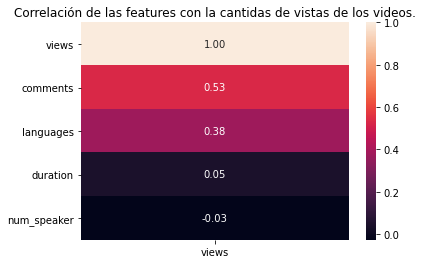

In [18]:
plt.title('Correlación de las features con la cantidas de vistas de los videos.')
sns.heatmap(data.corr()[['views']].sort_values(by='views', ascending=False), annot=True,fmt='.2f');

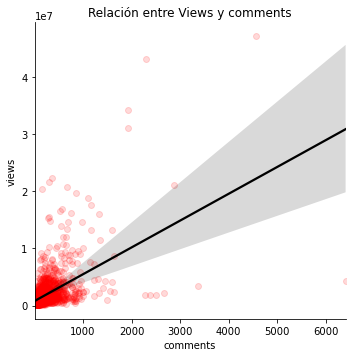

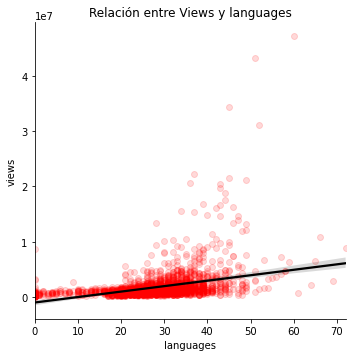

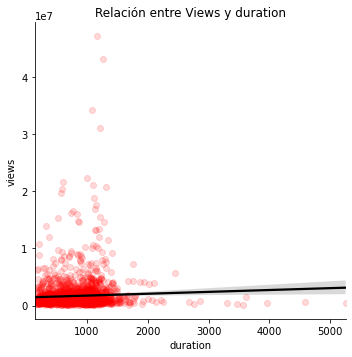

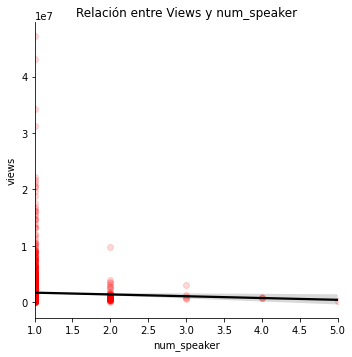

In [19]:
features_corr = ['comments','languages','duration','num_speaker']
for feature in features_corr:
    sns.lmplot(x=feature, y="views", data=data, scatter_kws={'color': 'red', 'alpha':0.15}, line_kws={'color': 'black'})
    plt.title(f'Relación entre Views y {feature}')

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='9'>9. Binarizo la variable views.</a>
</div>

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
pd.set_option('float_format', '{:,.0f}'.format)
data['views'].describe()

count        2,550
mean     1,698,297
std      2,498,479
min         50,443
25%        755,793
50%      1,124,524
75%      1,700,760
max     47,227,110
Name: views, dtype: float64

In [22]:
data['views_bins'] = data['views'].apply(lambda x: 1 if x > (np.percentile(data['views'],q=75)) else 0)

In [23]:
pd.set_option('float_format', '{:.2f}'.format)
data['views_bins'].value_counts(normalize=True)

0   0.75
1   0.25
Name: views_bins, dtype: float64

## Distribucion de views

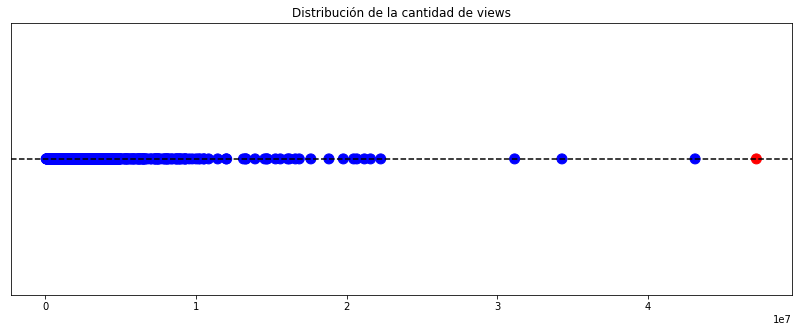

In [24]:
views_unique, counts = np.unique(data['views'], return_counts=True)
 
sizes = counts*100
colors = ['blue']*len(views_unique)
colors[-1] = 'red'

f, ax = plt.subplots()
f.set_figwidth(14)
f.set_figheight(5)
plt.title('Distribución de la cantidad de views')
plt.axhline(1, color='k', linestyle='--')
plt.scatter(views_unique, np.ones(len(views_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='10'>10. Creacion de pipelines.</a>
</div>

In [25]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self

**Estandarizo las variables comments, duration, languages y num_speaker (numeric_variables):** 

**Con respecto a la variable categórica 'Ocupación del orador', instancio en un pipeline el OneHotEncoder:** 

In [26]:
data['speaker_occupation'].fillna('Author',inplace=True)
numeric_features = ['comments', 'duration','languages','num_speaker']
categorical_features = ['speaker_occupation'] 

ocupaciones = []
for col in data[categorical_features]:
    ocupacion = data[col].unique()
    ocupaciones.append(ocupacion)

In [27]:
ocupaciones

[array(['Author', 'Activist', 'Technology columnist', ...,
        'Genomics researcher', 'Historian, philosopher',
        ' Robotics engineer'], dtype=object)]

In [28]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', categories=ocupaciones))])

In [29]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [30]:
pipeline_columns = numeric_features + categorical_transformer['onehot'].categories[0].tolist()
pipeline_columns[:6]

['comments', 'duration', 'languages', 'num_speaker', 'Author', 'Activist']

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='11'>11. Train Test Split y modelado.</a>
</div>

In [31]:
X = data[['comments', 'duration','languages','num_speaker','speaker_occupation']]
y = data['views_bins']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=30, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1912, 5), (638, 5), (1912,), (638,))

In [33]:
#Aplico las transformaciones a mi dataset

lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('log', LogisticRegression(solver='liblinear'))])

parameters = {'log__penalty': ['l1', 'l2'],
              'log__C': [0.01, 0.1, 1, 10, 100]}

In [34]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search_lr = GridSearchCV (lr, parameters,cv=folds, n_jobs = 5)

In [35]:
grid_search_lr.fit(pd.DataFrame(X_train, columns=X.columns), y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['comments',
                                                                          'duration',
                                                                          'languages',
                                                                          'num_speaker']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                               

In [36]:
print("Best score: %0.3f" % grid_search_lr.best_score_) 
print("Best parameters set:" )
best_parameters_lr = grid_search_lr.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters_lr[param_name])) 

Best score: 0.822
Best parameters set:
	 log__C: 0.1
	 log__penalty: 'l1'


In [37]:
#Performance sobre datos nuevos

y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       478
           1       0.75      0.38      0.51       160

    accuracy                           0.81       638
   macro avg       0.79      0.67      0.70       638
weighted avg       0.80      0.81      0.79       638

0.8134796238244514


<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='12'>12. Modelo KNN.</a>
</div>

In [39]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('KNN', KNeighborsClassifier())])

# Definimos ahora los hiperparámetros del modelo de KNeighborsClassifier
param_KNN = {'KNN__n_neighbors':range(2,200,2), 'KNN__weights':['uniform','distance']}
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
grid_knn=GridSearchCV(knn, param_KNN, cv=folds)
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['comments',
                                                                          'duration',
                                                                          'languages',
                                                                          'num_speaker']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                               

In [40]:
print("Best score: %0.3f" % grid_knn.best_score_) 
print("Best parameters set:" )
best_parameters_knn = grid_knn.best_estimator_.get_params()
for param_name in sorted (param_KNN . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters_knn[param_name])) 

Best score: 0.826
Best parameters set:
	 KNN__n_neighbors: 52
	 KNN__weights: 'uniform'


In [41]:
#Performance sobre datos nuevos del modelo optimizado.

y_pred_knn = grid_knn.best_estimator_.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       478
           1       0.74      0.38      0.50       160

    accuracy                           0.81       638
   macro avg       0.78      0.67      0.69       638
weighted avg       0.80      0.81      0.79       638

0.8119122257053292


<div class=""  
     style="font-size:17px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Guardo en una variable a las features de train y de test preprocesadas por el pipeline 'preprocessor'. Las voy a usar más adelante.
</div>

In [43]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_train_prepared_df = pd.DataFrame.sparse.from_spmatrix(X_train_prepared, columns=pipeline_columns)
X_test_prepared = preprocessor.transform(X_test)
X_test_prepared_df = pd.DataFrame.sparse.from_spmatrix(X_test_prepared, columns=pipeline_columns)
X_test_prepared_df.head() ## Agregar nombres a las columnas del dataframe procesado.

,comments,duration,languages,num_speaker,Author,Activist,Technology columnist,Global health expert; data visionary,Life coach; expert in leadership psychology,"Actor, comedian, playwright",...,Surveillance and cybersecurity counsel,Digital archaeologist,"Sociologist, human rights activist",Policy researcher,Hedge fund chair,Marketing leader,Border specialist,Genomics researcher,"Historian, philosopher",Robotics engineer
0,1.43,1.05,1.14,-0.14,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-0.28,-1.27,0.28,-0.14,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-0.12,0.09,0.92,-0.14,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.28,0.07,-0.14,-0.14,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.06,-0.89,-0.04,-0.14,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Decision boundaries para 1, 25 y 52 vecinos cercanos creados por el modelo de KNN:

In [47]:
pca=PCA(n_components=2)
X_transformed=pca.fit_transform(np.array(X_train_prepared_df))

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=15a23c167d45b7cbadcfffee93e023598e6ca2be350c992afa420a6ccf1d0369
  Stored in directory: c:\users\agust\appdata\local\pip\cache\wheels\f1\17\e1\1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


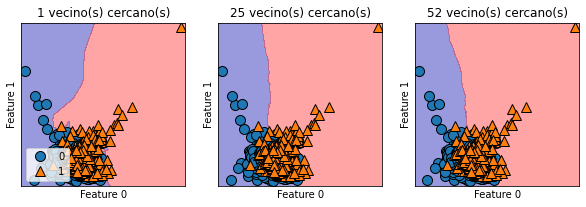

In [50]:
# !pip install mglearn
import mglearn

fig, axes =plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,25,52],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors,p=2,weights='distance').fit(X_transformed, y_train)
    mglearn.plots.plot_2d_separator(clf, X_transformed,fill=True,eps=0.5,ax=ax,alpha=0.4)
    mglearn.discrete_scatter(X_transformed[:,0],X_transformed[:,1],y_train, ax=ax)
    ax.set_title('{} vecino(s) cercano(s)'.format(n_neighbors))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend(loc=3);
    

Comparemos resultados de elegir diferentes cantidades de vecinos cercanos.

In [51]:
def scores_knn(X, y, start,stop,step):
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
     
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i,)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X, y, cv=folds)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
        
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [52]:
# Probamos de 1 a 200 vecinos
df_scores= scores_knn(X_transformed, y_train, 2, 200, 2)
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.79,0.01,2,0.78,0.80
1,0.80,0.01,4,0.80,0.81
2,0.81,0.01,6,0.80,0.82
3,0.81,0.01,8,0.80,0.82
4,0.81,0.01,10,0.79,0.82
...,...,...,...,...,...
94,0.80,0.01,190,0.79,0.82
95,0.80,0.01,192,0.79,0.81
96,0.80,0.01,194,0.79,0.81
97,0.80,0.01,196,0.79,0.81


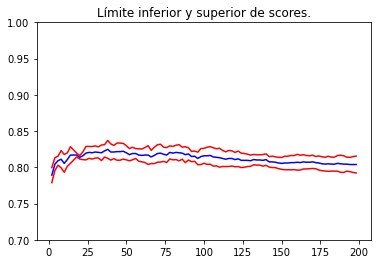

In [53]:
# Visualizamos los resultados
plt.title('Límite inferior y superior de scores.')
plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.7, 1);
#plt.savefig('../data/knn_1.png')

In [54]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
18,0.82,0.01,38,0.81,0.84


<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='13'>13. Comparación de los dos modelos usados anteriormente pero ahora optimizados con GridSearch.</a>
</div>

## Modelo Logistico

In [55]:
print (classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       478
           1       0.75      0.38      0.51       160

    accuracy                           0.81       638
   macro avg       0.79      0.67      0.70       638
weighted avg       0.80      0.81      0.79       638



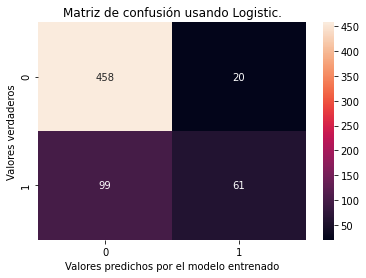

In [56]:
plt.title('Matriz de confusión usando Logistic.')
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='2d')
plt.xlabel('Valores predichos por el modelo entrenado')
plt.ylabel('Valores verdaderos');

## Modelo KNN

In [57]:
print (classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       478
           1       0.74      0.38      0.50       160

    accuracy                           0.81       638
   macro avg       0.78      0.67      0.69       638
weighted avg       0.80      0.81      0.79       638



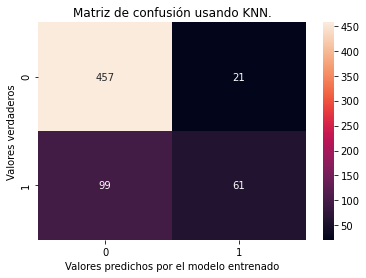

In [58]:
plt.title('Matriz de confusión usando KNN.')
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='2d')
plt.xlabel('Valores predichos por el modelo entrenado')
plt.ylabel('Valores verdaderos');

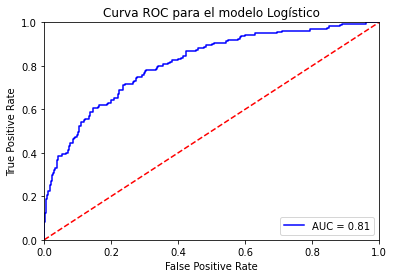

In [59]:

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = grid_search_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curva ROC para el modelo Logístico')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

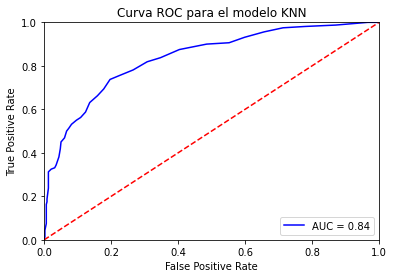

In [60]:
probs = grid_knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curva ROC para el modelo KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<div class="alert"  
     style="font-size:25px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 5px outset black; background-color: black;border-radius: 25px;">                
        <b>B. </b> <a id='explore'>Clustering.</a>
</div>

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='14'>14. Clustering. Intento buscar algunas características de las features que  permitan agruparlas entre sí.
    Modelo KMeans.</a>
</div>

<div class=""  
     style="font-size:17px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    Un <u> dendrograma </u> es un diagrama que muestra las distancias de atributos entre cada par de clases fusionadas de manera secuencial. Para evitar cruzar líneas, el diagrama se expone gráficamente de tal modo que los miembros de cada par de clases que se fusionan son elementos próximos.
    
La herramienta Dendrograma utiliza un algoritmo de clustering jerárquico. El programa primero calcula las distancias entre cada par de clases en el archivo de firma de entrada. Después, se fusiona iterativamente el par de clases más cercano y se fusiona sucesivamente el siguiente par de clases más cercano y el siguiente más cercano hasta que se fusionan todas las clases. Después de cada fusión, se actualizan las distancias entre todos los pares de clases. Las distancias a las que se fusionan las firmas de clases se utilizan para construir un dendrograma.
</div>




Preproceso incluyendo la variable target:

In [61]:
numeric_features_cluster = ['comments', 'duration','languages','num_speaker','views']
categorical_features_cluster = ['speaker_occupation'] 

In [62]:
pipeline_columns_cluster = numeric_features_cluster + categorical_transformer['onehot'].categories[0].tolist()
pipeline_columns_cluster[:10]

['comments',
 'duration',
 'languages',
 'num_speaker',
 'views',
 'Author',
 'Activist',
 'Technology columnist',
 'Global health expert; data visionary',
 'Life coach; expert in leadership psychology']

In [63]:
preprocessor_clustering = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_cluster),
        ('cat', categorical_transformer, categorical_features_cluster)])

In [64]:
data_cluster = preprocessor_clustering.fit_transform(data)
df_cluster = pd.DataFrame.sparse.from_spmatrix(data_cluster, columns=pipeline_columns_cluster)
df_cluster.head(2)

,comments,duration,languages,num_speaker,views,Author,Activist,Technology columnist,Global health expert; data visionary,Life coach; expert in leadership psychology,...,Surveillance and cybersecurity counsel,Digital archaeologist,"Sociologist, human rights activist",Policy researcher,Hedge fund chair,Marketing leader,Border specialist,Genomics researcher,"Historian, philosopher",Robotics engineer
0,15.45,0.90,3.42,-0.14,18.23,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.26,0.40,1.64,-0.14,0.60,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


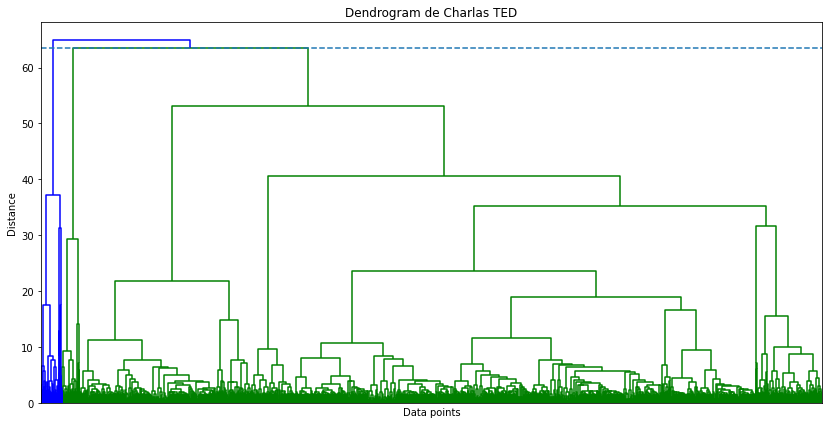

In [65]:
Z = linkage(df_cluster, method='ward');

plt.figure(figsize=[14,7])
plt.title('Dendrogram de Charlas TED')
plt.xlabel('Data points')
plt.ylabel('Distance')

color_palette=['b','g','r','y','c','m'];

hierarchy.set_link_color_palette(color_palette) 

dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=63.5,     
)
plt.hlines(63.5,0,df_cluster.shape[0]*100,linestyle='--')
plt.xticks([])
plt.show()

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='15'>15. Silhouette  Score.</a>
</div>

<div class=""  
     style="font-size:17px;color:black;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 0px outset black; background-color: LemonChiffon;border-radius: 0px;">                
    El coeficiente silhouette mide cuán cercano es un punto al resto de los que están en su mismo cluster.
</div>


Si  𝑠  es cercano a 1, significa que el punto  𝑖  está correctamente etiquetado;  𝑠  cercano a cero indica que estaría igual de bien (o mal) etiquetarlo con el cluster vecino más cercano; y  𝑠  cercano a -1 significa que el punto  𝑖  está mal etiquetado y pertenece al cluster vecino.

In [66]:
range_n_clusters = range(2,15,1)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_train_prepared_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_train_prepared_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6193831351614544)
For n_clusters = 3, silhouette score is 0.20006105937304994)
For n_clusters = 4, silhouette score is 0.2096440782267164)
For n_clusters = 5, silhouette score is 0.22271374565612764)
For n_clusters = 6, silhouette score is 0.21421122004784438)
For n_clusters = 7, silhouette score is 0.2278395682088955)
For n_clusters = 8, silhouette score is 0.23227659134532963)
For n_clusters = 9, silhouette score is 0.14405173094938972)
For n_clusters = 10, silhouette score is 0.15239001085012502)
For n_clusters = 11, silhouette score is 0.13766410990176695)
For n_clusters = 12, silhouette score is 0.13360193862578493)
For n_clusters = 13, silhouette score is 0.12316860793985535)
For n_clusters = 14, silhouette score is 0.11166280256871429)


Por el silhouette score, tenemos indicios de que no hay clusters demasiados claros. Pero n=2 sería el más acertados.

## Busco el valor óptimo de cantidad de clusters

In [67]:
# buscamos K

inertia=[]
sil=[]
ch_scores=[]
k_values=range(1,15,1)

for k in k_values:
    km=KMeans(n_clusters=k)
    km.fit(X_train_prepared_df)
    inertia.append(km.inertia_)   

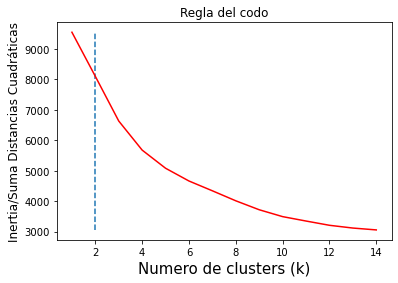

In [68]:
plt.plot(k_values,inertia,color='red');
plt.vlines(2,np.min(inertia),np.max(inertia),linestyle='dashed')
plt.title('Regla del codo')
plt.xlabel('Numero de clusters (k)',fontsize=15);plt.ylabel('Inertia/Suma Distancias Cuadráticas',fontsize='12');

<div class="alert"  
     style="font-size:15px;color:white;font-family: Segoe UI Semibold,Candara,Segoe,Segoe UI,Optima,Arial,sans-serif;text-align: left;
            border: 1px outset black; background-color: DarkBlue;border-radius: 0px;">               
        <a id='16'>16. Visualización en un espacio de dimensionalidad reducida.</a>
</div>

### Se hace el gráfico de clusters reduciendo la dimensionalidad y conservando dos componentes principales.

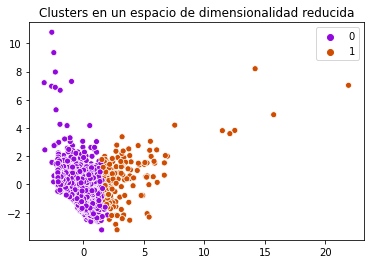

In [70]:
k=2;
km=KMeans(n_clusters=k,random_state=0)
km.fit(df_cluster)

pca=PCA(n_components=2)
X_transformed=pca.fit_transform(np.array(df_cluster))

plt.title('Clusters en un espacio de dimensionalidad reducida')
sns.scatterplot(X_transformed[:,0],X_transformed[:,1],hue=km.labels_,palette='gnuplot');

Busquemos las características de cada cluster.

In [71]:
cluster_0_mask = km.labels_ ==0
cluster_0 = data[cluster_0_mask]

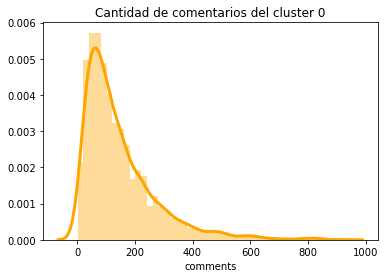

In [72]:
sns.distplot(cluster_0.comments, color='orange',kde_kws=dict(linewidth=3))
plt.title('Cantidad de comentarios del cluster 0');

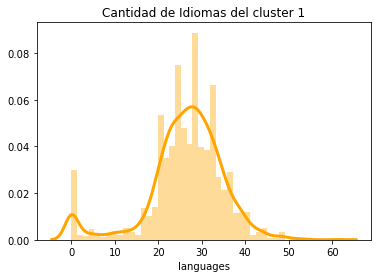

In [73]:
sns.distplot(cluster_0.languages, color='orange',kde_kws=dict(linewidth=3))
plt.title('Cantidad de Idiomas del cluster 1');

In [74]:
cluster_1_mask = km.labels_ ==1
cluster_1 = data[cluster_1_mask]

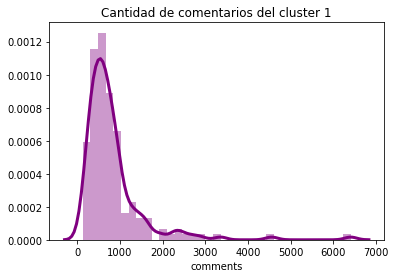

In [75]:
sns.distplot(cluster_1.comments,color='purple',kde_kws=dict(linewidth=3))
plt.title('Cantidad de comentarios del cluster 1');

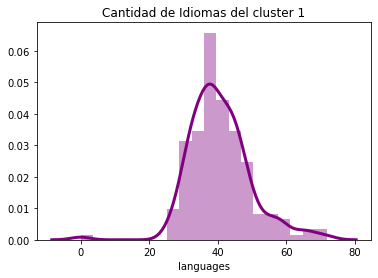

In [76]:
sns.distplot(cluster_1.languages,color='purple',kde_kws=dict(linewidth=3))
plt.title('Cantidad de Idiomas del cluster 1');

In [77]:
comparacion = {'Media de Idiomas cluster 0': cluster_0.languages.mean(),
'Media de Idiomas cluster 1':cluster_1.languages.mean(),
 'Media de comentarios cluster 0':cluster_0.comments.mean(),
 'Media de comentarios cluster 1':cluster_1.comments.mean(),
 'Media de views de cluster 0':cluster_0.views.mean(),
 'Media de views de cluster 1': cluster_1.views.mean()}

pd.DataFrame.from_dict(comparacion,orient='index',columns=['Media'])

,Media
Media de Idiomas cluster 0,26.38
Media de Idiomas cluster 1,40.64
Media de comentarios cluster 0,146.82
Media de comentarios cluster 1,821.88
Media de views de cluster 0,1286683.78
Media de views de cluster 1,7497423.08


Analicemos las ocupaciones del cluster 1 que parece ser los videos que más se vuelven virales.

In [78]:
# Descripcion de las mas vistas en el cluster 1

cluster_1.sort_values(by='views', ascending=False).description[:10]

0       Sir Ken Robinson makes an entertaining and pro...
1346    Body language affects how others see us, but i...
677     Simon Sinek has a simple but powerful model fo...
837     Brené Brown studies human connection -- our ab...
452     "Bonk" author Mary Roach delves into obscure s...
1776    Have you ever felt like you're talking, but no...
201     Jill Bolte Taylor got a research opportunity f...
5       Tony Robbins discusses the "invisible forces" ...
2114    Suspicious emails: unclaimed insurance bonds, ...
1416    Cameron Russell admits she won “a genetic lott...
Name: description, dtype: object

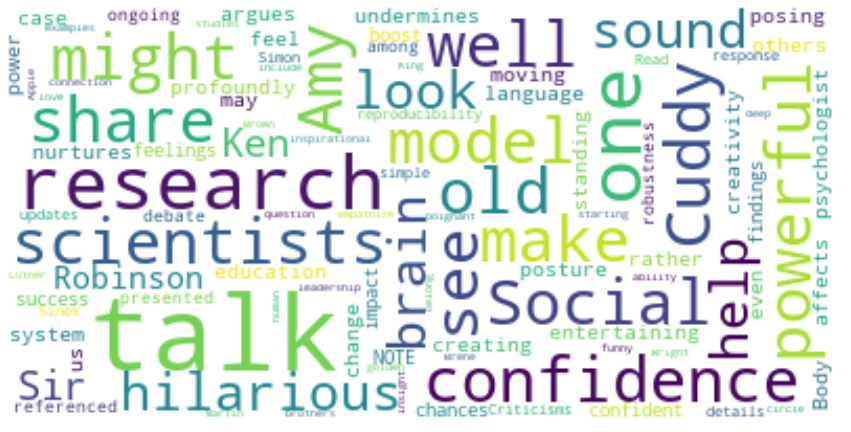

In [79]:
import sys

allText = ''
for text in cluster_1.sort_values(by='views', ascending=False).description[:10]:
    allText += text
#!pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(allText)
plt.figure( figsize=(15,15) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
#Ocupations que recibieron más views del cluster 1:
ocupaciones_cluster1 = cluster_1.sort_values(by='views', ascending=False).speaker_occupation[:10]

In [ ]:
#!pip install PIL
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
char_mask = np.array(Image.open(r"TED.png"))    
image_colors = ImageColorGenerator(char_mask)
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", stopwords=stopwords, max_words=200, width=400, height=400, mask=char_mask, random_state=1).generate(text)
wc.generate(text)
plt.figure(figsize=(15,20))
plt.imshow(wc.recolor(color_func=image_colors))
plt.title('Wordcloud de la descripción de los 10 videos más vistos en el cluster de charlas exitosas.');